<a href="https://colab.research.google.com/github/Sanskriti181299/Walmart-/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

**Load** **the** **Data**

In [ ]:
walmart = pd.read_csv("/content/Walmart DataSet.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**Data Exploration**

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
walmart.shape

(6435, 8)

In [ ]:
#Convert 'Date' into Datetime

walmart['Date'] = pd.to_datetime(walmart['Date'], format ="%d-%m-%Y")

#Extract Month, Year and Week
walmart['Week'] = walmart['Date'].dt.isocalendar().week
walmart['Month'] = walmart['Date'].dt.month
walmart['Year'] = walmart['Date'].dt.isocalendar().year

#Combine Year + Week (for grouping)

walmart['Year_Week'] = walmart['Year'].astype(str) + '-W' + walmart['Week'].astype(str)

#Combine Year + Month (for grouping)

walmart['Year_Month'] = walmart['Year'].astype(str) + '-M' + walmart['Month'].astype(str)

In [ ]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year,Year_Week,Year_Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,2010-W5,2010-M2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010,2010-W6,2010-M2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010,2010-W7,2010-M2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010,2010-W8,2010-M2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010,2010-W9,2010-M3


**Missing Values**

In [ ]:
missing_val = walmart.isnull().sum()
missing_val_per = (missing_val/len(walmart))*100
missing_val_analysis = {'missing_val': missing_val, 'missing_val_per' : missing_val_per}
missing_val_analysis = pd.DataFrame(missing_val_analysis)
missing_val_analysis

,missing_val,missing_val_per
Store,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0
Week,0,0.0
Month,0,0.0


There are no missing values in the Dataset.

**Outlier Detection**

In [ ]:
for col_name in walmart.columns:
  if(walmart[col_name].dtypes =='numeric'):
    plt.boxplot(walmart[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [ ]:
outlier_col = ('Unemployment','Weekly_Sales', 'Temperature')

In [ ]:
for x in outlier_col:
  Q1 = walmart[x].quantile(0.25)
  Q3 = walmart[x].quantile(0.75)
  IQR = Q3- Q1
  LB = Q1 - (1.5*IQR)
  UB = Q3 + (1.5*IQR)
  walmart = walmart[(walmart[x]>= LB) & (walmart[x]<= UB)]

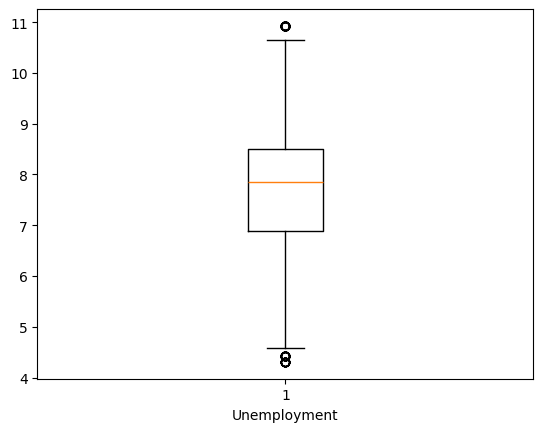

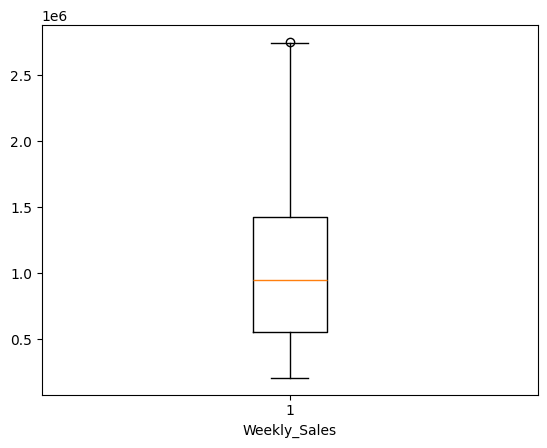

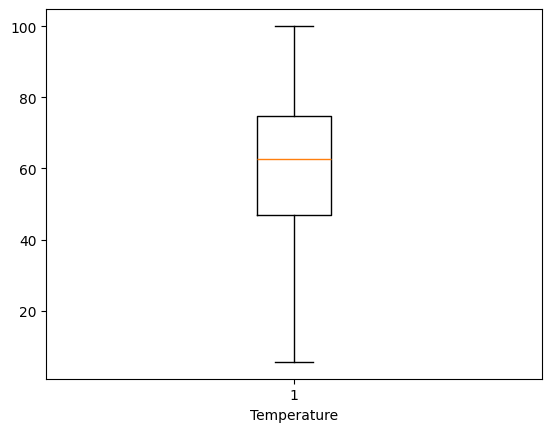

In [ ]:
for x in outlier_col:
  if walmart[x].dtype != 'object':
    plt.boxplot(walmart[x])
    plt.xlabel(x)
    plt.show()

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

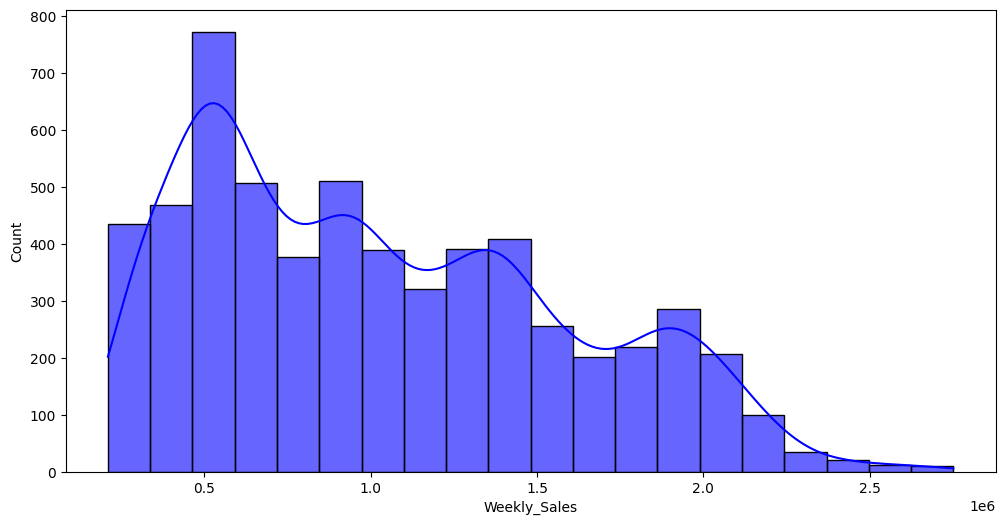

In [ ]:
plt.figure(figsize=(12,6))

sns.histplot(walmart["Weekly_Sales"], bins=20, kde=True, color="blue", alpha=0.6)

In [ ]:
yearly_sales = walmart.groupby("Year")["Weekly_Sales"].sum().reset_index()
yearly_sales

,Year,Weekly_Sales
0,2010,2.108783e+09
1,2011,2.265073e+09
2,2012,1.791352e+09


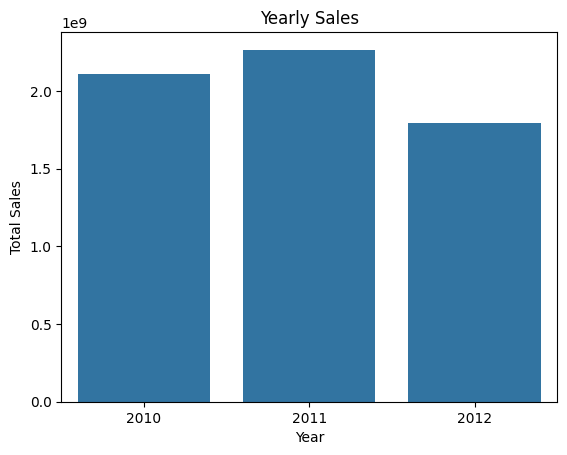

In [ ]:
sns.barplot(x="Year", y="Weekly_Sales", data=yearly_sales)
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


<Axes: xlabel='Unemployment', ylabel='Count'>

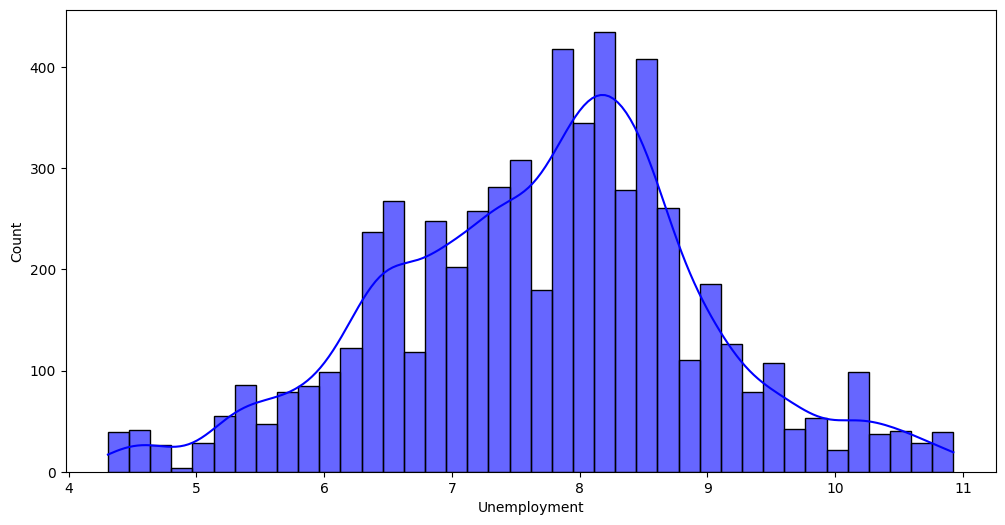

In [ ]:
plt.figure(figsize=(12,6))

sns.histplot(walmart["Unemployment"], bins = 40, kde=True, color="blue", alpha=0.6)

Check the correlation between Numerical Data Variables:

In [ ]:
corrMat = walmart.select_dtypes(include=['number']).corr()
corrMat

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
Store,1.000000,-0.319333,0.004416,-0.026621,0.048055,-0.208372,0.309716,0.013039,0.012839,-0.006820
Weekly_Sales,-0.319333,1.000000,0.023601,-0.044403,0.018355,-0.083295,-0.074367,0.044110,0.047246,-0.023549
Holiday_Flag,0.004416,0.023601,1.000000,-0.156300,-0.076337,-0.000277,0.011191,0.123839,0.119343,-0.053617
Temperature,-0.026621,-0.044403,-0.156300,1.000000,0.145764,0.218735,0.025205,0.244256,0.243425,0.084122
Fuel_Price,0.048055,0.018355,-0.076337,0.145764,1.000000,-0.144159,-0.104684,-0.019737,-0.029843,0.782914
CPI,-0.208372,-0.083295,-0.000277,0.218735,-0.144159,1.000000,-0.218355,0.001925,0.000573,0.086923
Unemployment,0.309716,-0.074367,0.011191,0.025205,-0.104684,-0.218355,1.000000,-0.012810,-0.010102,-0.241566
Week,0.013039,0.044110,0.123839,0.244256,-0.019737,0.001925,-0.012810,1.000000,0.995939,-0.170406
Month,0.012839,0.047246,0.119343,0.243425,-0.029843,0.000573,-0.010102,0.995939,1.000000,-0.183163
Year,-0.006820,-0.023549,-0.053617,0.084122,0.782914,0.086923,-0.241566,-0.170406,-0.183163,1.000000


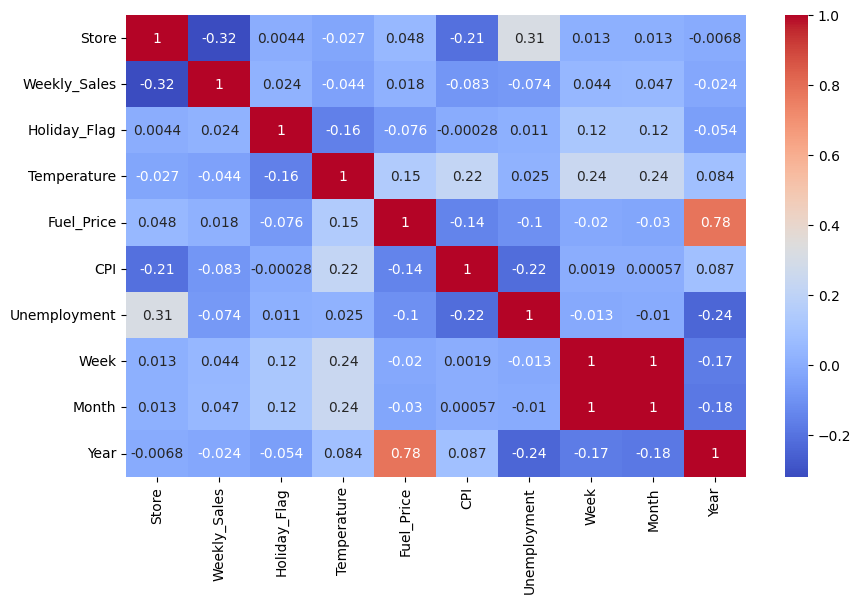

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(corrMat, annot = True, cmap = 'coolwarm')
plt.show()

*Observations: CPI and Unemployement has least correlation with each others.*

a) **If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**


In [ ]:
# correlation
walmart[["Weekly_Sales", "Unemployment"]].corr()

,Weekly_Sales,Unemployment
Weekly_Sales,1.000000,-0.074367
Unemployment,-0.074367,1.000000


- As correlation is -0.07 Weak correlation.
- The correlation is slightly negative, but too small to be important.
- Weekly sales are NOT significantly affected by the unemployment rate.

In [ ]:
store_corr = walmart.groupby("Store")[["Weekly_Sales","Unemployment"]].corr().iloc[0::2,-1]
store_corr

,,Unemployment
Store,,
1,Weekly_Sales,-0.097955
2,Weekly_Sales,0.054288
3,Weekly_Sales,-0.230413
4,Weekly_Sales,-0.560534
5,Weekly_Sales,-0.207043
6,Weekly_Sales,0.044251
7,Weekly_Sales,-0.165131
8,Weekly_Sales,-0.052580
9,Weekly_Sales,-0.191534


In [ ]:
store_corr.sort_values().head()

,,Unemployment
Store,,
44,Weekly_Sales,-0.780076
4,Weekly_Sales,-0.560534
13,Weekly_Sales,-0.400254
39,Weekly_Sales,-0.384681
42,Weekly_Sales,-0.356355


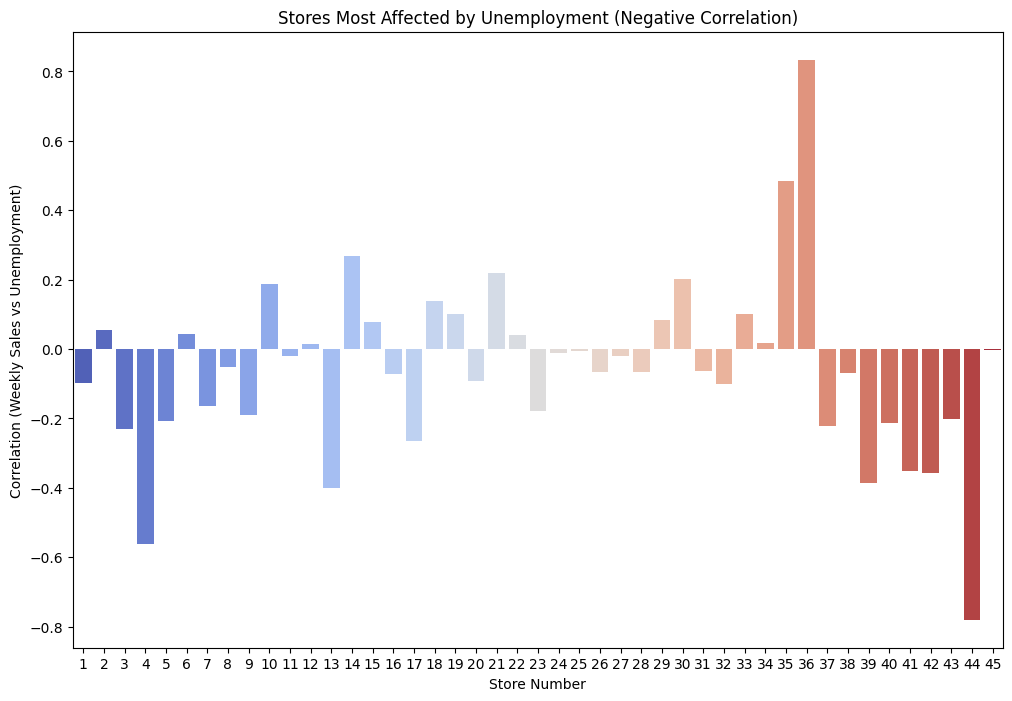

In [ ]:
df_corr = store_corr.reset_index()
df_corr.columns = ['Store', 'Measure', 'Correlation'] # Rename columns based on reset_index() output
df_corr = df_corr.drop(columns=['Measure']) # Drop the intermediate column

plt.figure(figsize=(12,8))
sns.barplot(data=df_corr, x="Store", y= "Correlation", palette="coolwarm")
plt.title("Stores Most Affected by Unemployment (Negative Correlation)", fontsize=12)
plt.xlabel("Store Number")
plt.ylabel("Correlation (Weekly Sales vs Unemployment)")
plt.show()

Stores at the top (Store 44, 4, 13, 42, 41, 39) have most negatively impacted

Bars near 0 have Little to no impact

Positive values sales not impacted by unemployment

**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

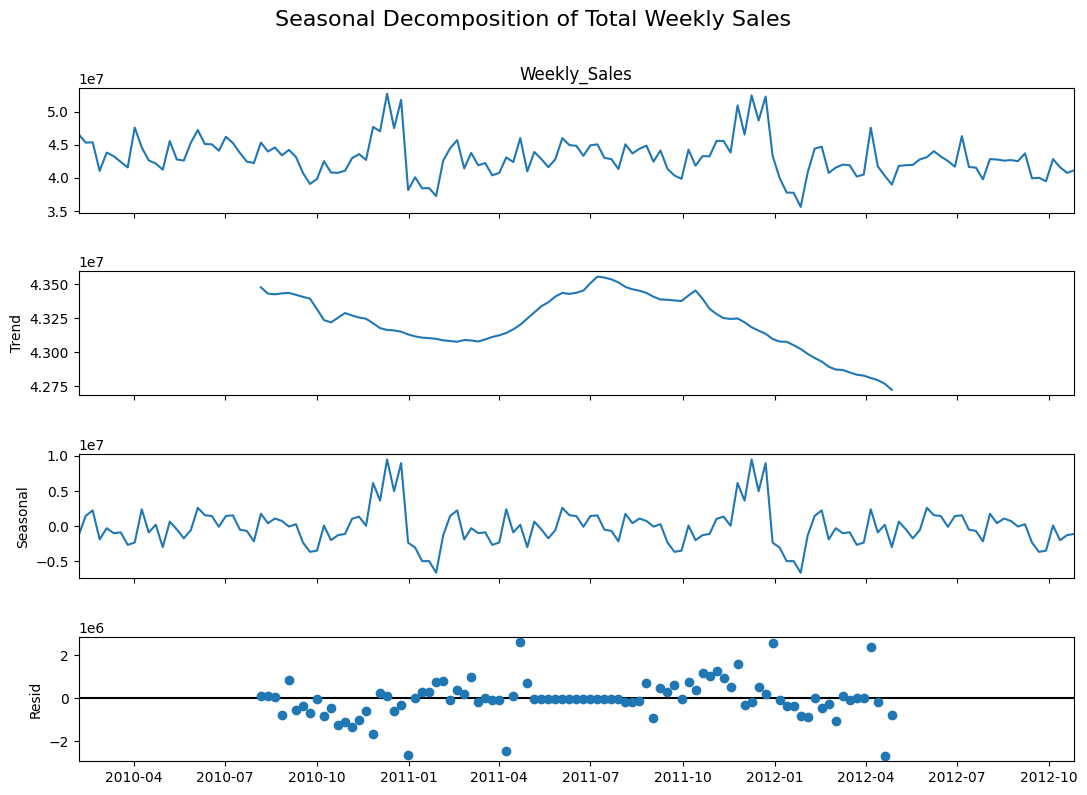

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# The 'Date' column is already a datetime object from previous steps.

# Aggregate total weekly sales across all stores for each unique date
# Ensure 'Date' is set as the index for time series decomposition
ts = walmart.groupby('Date')['Weekly_Sales'].sum().sort_index()

full_index = pd.date_range(start=ts.index.min(), end=ts.index.max(), freq='W-FRI')
ts = ts.reindex(full_index)
# Fill missing values
ts = ts.interpolate(method='linear')

# Only decompose if we have at least 52 weeks (a full year for weekly seasonality)
if len(ts) >= 52:
    # Perform seasonal decomposition with period=52 (for yearly seasonality in weekly data)
    result = seasonal_decompose(ts, model="additive", period=52)

    # Plot results
    fig = result.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle("Seasonal Decomposition of Total Weekly Sales", fontsize=16, y=1.02)
    plt.show()
else:
    print(f" Not enough data to perform seasonal decomposition with a period of 52 weeks.")

Yes, the weekly sales in the Walmart dataset do show a clear seasonal trend. When we analyze certain weeks consistently show higher sales, while others show lower sales, indicating repeating seasonal behavior each year.
The dataset clearly shows strong seasonal behavior—sales are highest during holidays and fall after them.

Sharp peaks every year around November - December
-Black Friday, Thanksgiving, Christmas

Smaller peaks around Easter and Back-to-School

Dips around January - February
Post-holiday slowdown

Customers spend more on gifts, groceries, decorations, electronics, and holiday items.

**c)  Does temperature affect the weekly sales in any manner?**

In [ ]:
walmart[['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.000000,-0.044403
Temperature,-0.044403,1.000000



CPI vs Weekly Sales Correlation by Store

    Store  Temp_Correlation
0       1         -0.222701
1       2         -0.272249
2       3         -0.377524
3       4         -0.137328
4       5         -0.175517
5       6         -0.084863
6       7          0.013383
7       8         -0.312324
8       9         -0.208343
9      10         -0.475243
10     11         -0.278503
11     12          0.210494
12     13          0.181859
13     14         -0.082329
14     15         -0.050541
15     16          0.182948
16     17          0.081012
17     18         -0.144278
18     19         -0.080805
19     20         -0.129014
20     21         -0.177084
21     22         -0.082892
22     23         -0.054284
23     24          0.111833
24     25         -0.031311
25     26          0.211722
26     27          0.209135
27     28          0.161447
28     29         -0.129144
29     30         -0.330816
30     31         -0.262192
31     32         -0.111681
32     33          0.019244
33   

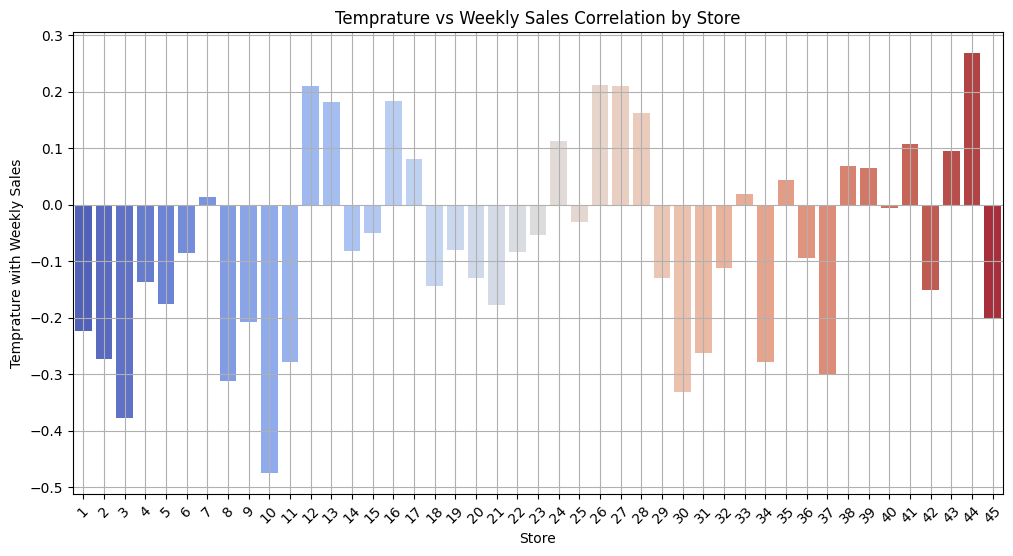

In [ ]:
cpi_corr_summary = walmart.groupby('Store').apply(lambda x: x['Temperature'].corr(x['Weekly_Sales'])).reset_index()
cpi_corr_summary.columns = ['Store', 'Temp_Correlation']
print("\nCPI vs Weekly Sales Correlation by Store\n")
print(cpi_corr_summary)

plt.figure(figsize=(12,6))
sns.barplot(data=cpi_corr_summary, x='Store', y='Temp_Correlation', palette='coolwarm')
plt.title("Temprature vs Weekly Sales Correlation by Store")
plt.xlabel("Store")
plt.ylabel("Temprature with Weekly Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Based on correlation analysis and visualization, temperature does not significantly affect Walmart's weekly sales. The correlation between Weekly Sales and Temperature is close to zero, indicating no meaningful relationship. Sales remain relatively stable across both high and low temperature weeks, suggesting that temperature is not a key driver of weekly sales in this dataset. Also the regression line is  almost flat showing on impact of Temperature on Sales.

Higher the Temprature = Lower The Weekly Sale




**d)  How is the Consumer Price index affecting the weekly sales of various stores?**

In [ ]:
walmart[['Weekly_Sales', 'CPI']].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.083295
CPI,-0.083295,1.000000


It shows small negative correlation.

When CPI increases → weekly sales slightly decrease

However, the impact is very weak, not strong

This indicates CPI is not a major driver of Walmart sales.

In [ ]:
store_cpi_corr = walmart.groupby("Store")[["Weekly_Sales","CPI"]].corr().iloc[0::2, -1]
store_cpi_corr

,,CPI
Store,,
1,Weekly_Sales,0.225408
2,Weekly_Sales,-0.063786
3,Weekly_Sales,0.317250
4,Weekly_Sales,0.587133
5,Weekly_Sales,0.308261
6,Weekly_Sales,-0.011357
7,Weekly_Sales,0.288948
8,Weekly_Sales,0.120255
9,Weekly_Sales,0.294805


Store wise correlation results also confirm that CPI does not significantly impact sales for most stores. This suggests that factors like seasonality, holidays, promotions and consumer behavior play a far more important role in driving weekly sales than CPI.

Different Stores shows Different Trends against CPI
Stores 1–15 approx : Mostly low to moderate positive correlations (0.1 to 0.35). In these stores, higher CPI (inflation) didn’t reduce sales much
Stores 16-35 approx : Several negative correlations. For these stores, as CPI rose, sales dropped sharply
Stores 36-45 : A mix of very strong positive correlations and some negative ones.

**e) Top performing stores according to the historical data.**

In [ ]:
top_performing_stores = walmart.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)

In [ ]:
top_performing_stores.head(10)

,Weekly_Sales
Store,
20,2.827759e+08
14,2.761276e+08
2,2.687221e+08
13,2.682025e+08
10,2.556789e+08
27,2.507778e+08
4,2.473888e+08
6,2.237561e+08
1,2.224028e+08


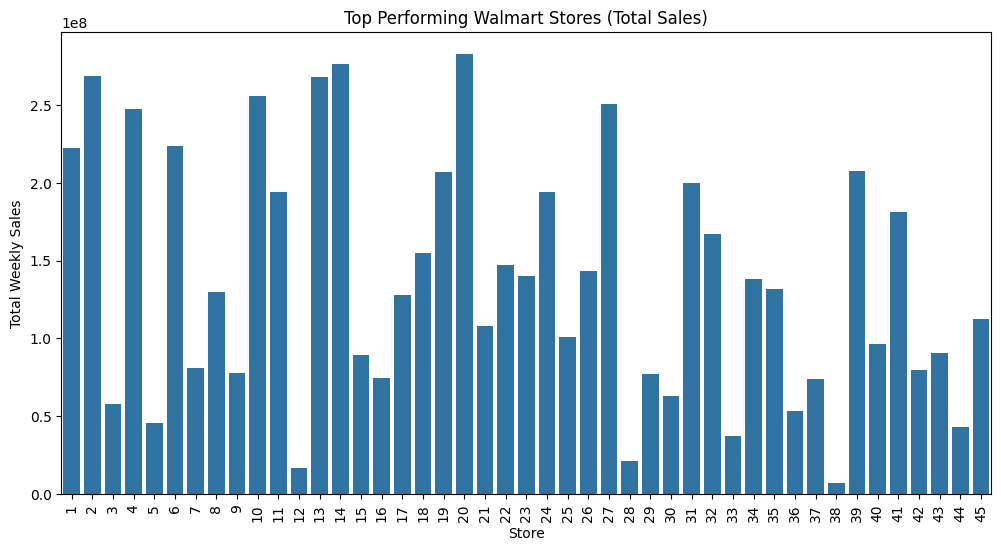

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x= top_performing_stores.index, y= top_performing_stores.values)
plt.title("Top Performing Walmart Stores (Total Sales)")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.xticks(rotation=90)

plt.show()

The top-performing stores are those with the highest cumulative sales across the years. These stores consistently generate higher revenue due to larger customer bases, better locations, strong management, and closeness to high-demand areas. The bar chart clearly highlights the top stores, showing significant variation in performance across the 45 Walmart stores.

Store 20 is the top-performing store amongst all.

**f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.**

 Best Performing Store:
Store          2.000000e+01
Total_Sales    2.827759e+08
Name: 0, dtype: float64

 Worst Performing Store:
Store               38.00
Total_Sales    7347378.89
Name: 44, dtype: float64

 Difference in Total Sales: 275,428,478.00
 Percentage Gap between Best and Worst: 97.40%


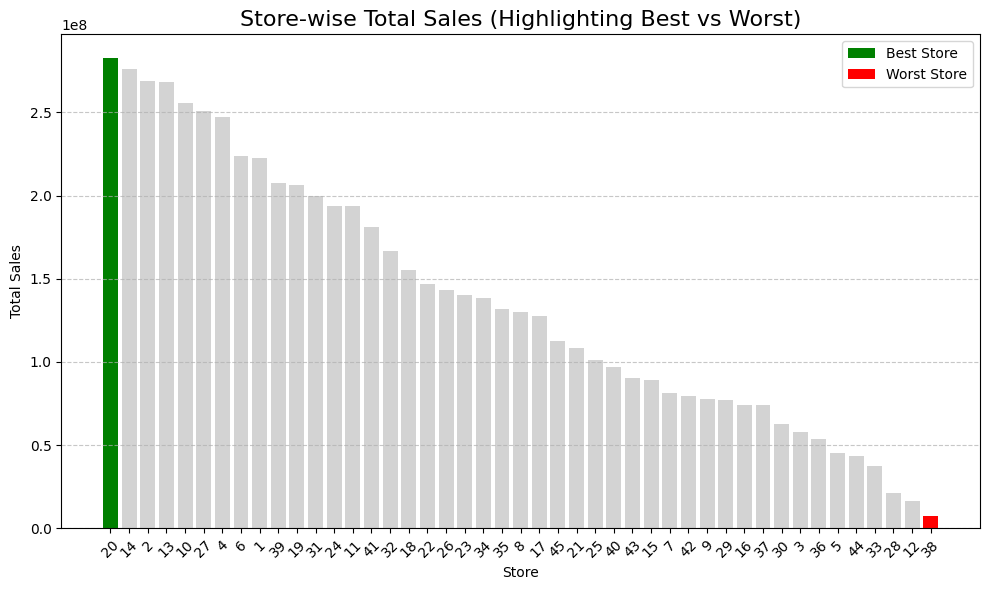

In [ ]:
# Convert the top_performing_stores Series to a DataFrame and rename columns
store_performance = top_performing_stores.reset_index()
store_performance.columns = ['Store', 'Total_Sales']

# Find best and worst performing stores
best_store = store_performance.loc[store_performance['Total_Sales'].idxmax()]
worst_store = store_performance.loc[store_performance['Total_Sales'].idxmin()]

# Calculate difference
sales_diff = best_store['Total_Sales'] - worst_store['Total_Sales']
percent_diff = (sales_diff / best_store['Total_Sales']) * 100
print(" Best Performing Store:")
print(best_store)
print("\n Worst Performing Store:")
print(worst_store)
print(f"\n Difference in Total Sales: {sales_diff:,.2f}")
print(f" Percentage Gap between Best and Worst: {percent_diff:.2f}%")

# --- Visualization --
plt.figure(figsize=(10,6))
plt.bar(store_performance['Store'].astype(str), store_performance['Total_Sales'], color='lightgray')
plt.bar(str(int(best_store['Store'])), best_store['Total_Sales'], color='green', label='Best Store')
plt.bar(str(int(worst_store['Store'])), worst_store['Total_Sales'], color='red', label='Worst Store')
plt.title("Store-wise Total Sales (Highlighting Best vs Worst)", fontsize=16)
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

In [ ]:
def forecast_sales_sarima(store_id):
    # Filter store data
    store_df = walmart[walmart['Store'] == store_id][['Date', 'Weekly_Sales']].copy()
    store_df['Date'] = pd.to_datetime(store_df['Date'], errors='coerce')
    store_df.set_index('Date', inplace=True)

    # Make sure weekly frequency is set
    store_df = store_df.asfreq('W', method='pad')

    # Fit SARIMA model (seasonality - yearly = 52 weeks)
    model = SARIMAX(store_df['Weekly_Sales'],
                    order=(1,1,1),
                    seasonal_order=(1,1,1,52),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit(disp=False)

    # Forecast next 12 weeks
    forecast = results.get_forecast(steps=12)
    forecast_index = pd.date_range(store_df.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')

    # Plot historical + forecast
    plt.figure(figsize=(12,6))
    plt.plot(store_df.index, store_df['Weekly_Sales'], label="Historical", color='blue')
    plt.plot(forecast_index, forecast.predicted_mean, label="Forecast", color='orange')
    plt.fill_between(forecast_index,
                     forecast.conf_int().iloc[:,0],
                     forecast.conf_int().iloc[:,1], color='orange', alpha=0.3, label="Confidence Interval")
    plt.title(f" Store {store_id} - 12 Week Sales Forecast (SARIMA)")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.grid(True)
    plt.show()

#Dropdown for store selection
store_ids = sorted(walmart['Store'].unique())


In [ ]:
interact(forecast_sales_sarima, store_id=widgets.Dropdown(options=store_ids, description="Select Store:"))

interactive(children=(Dropdown(description='Select Store:', options=(np.int64(1), np.int64(2), np.int64(3), np…

<function __main__.forecast_sales_sarima(store_id)>